In [1]:
import pandas as pd

In [2]:

df = pd.read_json("News_Category_Dataset_v3.json", lines=True)

df.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [27]:
df.columns


Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [21]:
keep_categories = ["POLITICS", "TRAVEL", "SPORTS", "HOME & LIVING"]
df_filtered = df[df["category"].isin(keep_categories)]

In [4]:
df_balanced = pd.concat(
    [
        df_filtered[df_filtered["category"] == cat].sample(n=1000, random_state=42)
        for cat in keep_categories
    ],
    ignore_index=True
)
df_balanced

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/us-lawmakers-jo...,U.S. Lawmakers Join Demand For Puerto Rico Gov...,POLITICS,Puerto Ricans staged week-long protests callin...,"Andrew Hay, Reuters",2019-07-21
1,https://www.huffingtonpost.com/entry/as-florid...,"As Florida Governor, Jeb Bush Provided Special...",POLITICS,,,2015-06-23
2,https://www.huffingtonpost.com/entry/dianne-fe...,Dianne Feinstein Wants Hillary Clinton To 'Ste...,POLITICS,,Sam Levine,2015-03-08
3,https://www.huffingtonpost.com/entry/bill-clin...,Bill Clinton: I Don't Think I'm Good At Campai...,POLITICS,,Paige Lavender,2015-04-07
4,https://www.huffingtonpost.com/entry/trump-cbo...,Donald Trump Loved To Cite The Nonpartisan Age...,POLITICS,The Congressional Budget Office's projection a...,Igor Bobic,2017-03-13
...,...,...,...,...,...,...
3995,https://www.huffingtonpost.com/entry/repurposi...,Repurposing Ideas: 5 Other Uses For Dish Soap,HOME & LIVING,Lawn Furniture Cleaner With fall rapidly appro...,"Chris Barnes, Contributor\nNon-Profit Public R...",2012-09-11
3996,https://www.huffingtonpost.com/entry/watch-fro...,"WATCH: From Tree to Table, a Brooklyn Designer...",HOME & LIVING,Daniel Moyer is a great example of a contempor...,"Chauncey Zalkin, Contributor\nWriter, What Wom...",2012-02-13
3997,https://www.huffingtonpost.com/entry/weekly-ro...,Weekly Roundup of eBay Vintage Home Finds (PHO...,HOME & LIVING,"As always, buyer beware! Be sure to read the l...","Mary Kincaid, Contributor\nFounder and Editor ...",2012-02-07
3998,https://www.huffingtonpost.comhttp://www.reals...,6 Time-Saving Cleaning Tricks,HOME & LIVING,These easy habits will save you serious elbow ...,,2013-07-23


In [22]:
df_final = df_balanced[["short_description", "category"]].reset_index(drop=True)

df_final.tail()

,short_description,category
3995,Lawn Furniture Cleaner With fall rapidly appro...,HOME & LIVING
3996,Daniel Moyer is a great example of a contempor...,HOME & LIVING
3997,"As always, buyer beware! Be sure to read the l...",HOME & LIVING
3998,These easy habits will save you serious elbow ...,HOME & LIVING
3999,"Whether it’s a shiny tea pot, cooking pans or ...",HOME & LIVING


In [23]:

train_list = []
test_list = []

for cat, group in df_final.groupby("category"):
    n = len(group)
    n_train = int(0.8 * n)  # 80%
    
    # shuffle rows
    group = group.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # split
    train_cat = group.iloc[:n_train]
    test_cat = group.iloc[n_train:]
    
    train_list.append(train_cat)
    test_list.append(test_cat)

# combine
train_df = pd.concat(train_list).reset_index(drop=True)
test_df = pd.concat(test_list).reset_index(drop=True)

print("Train size:", len(train_df))
print("Test size:", len(test_df))

print("\nTrain distribution:\n", train_df["category"].value_counts())
print("\nTest distribution:\n", test_df["category"].value_counts())


Train size: 3200
Test size: 800

Train distribution:
 category
HOME & LIVING    800
POLITICS         800
SPORTS           800
TRAVEL           800
Name: count, dtype: int64

Test distribution:
 category
HOME & LIVING    200
POLITICS         200
SPORTS           200
TRAVEL           200
Name: count, dtype: int64


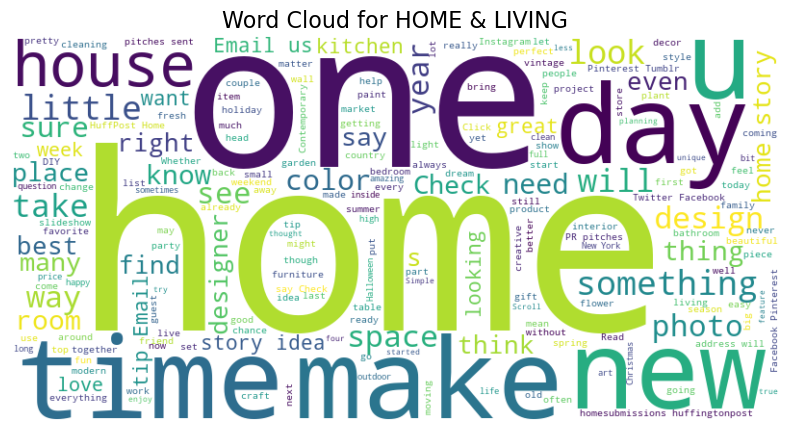

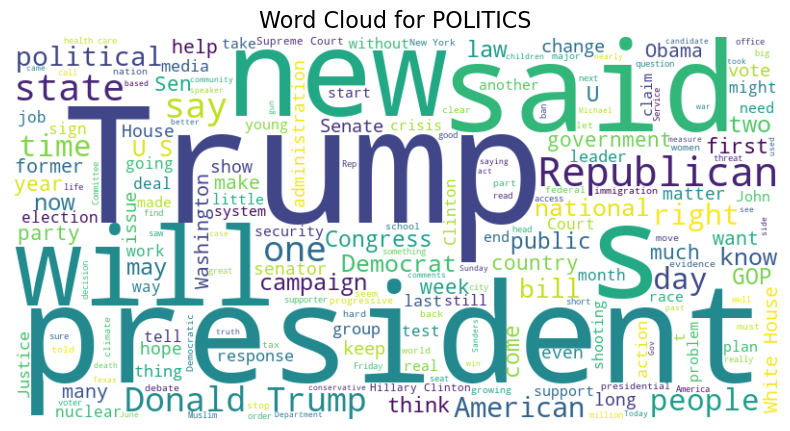

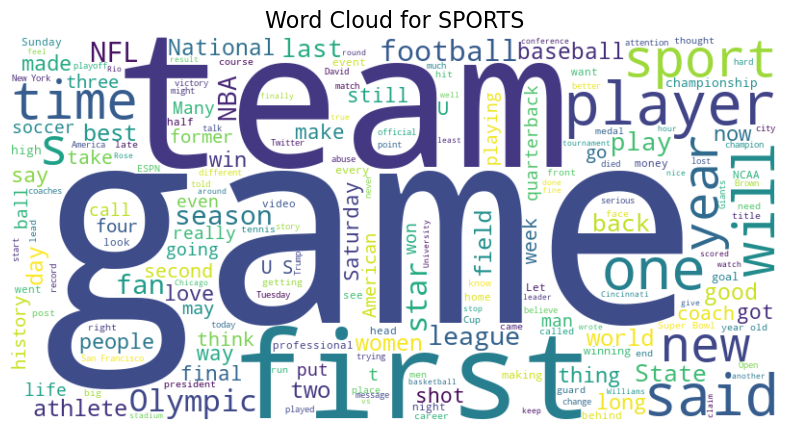

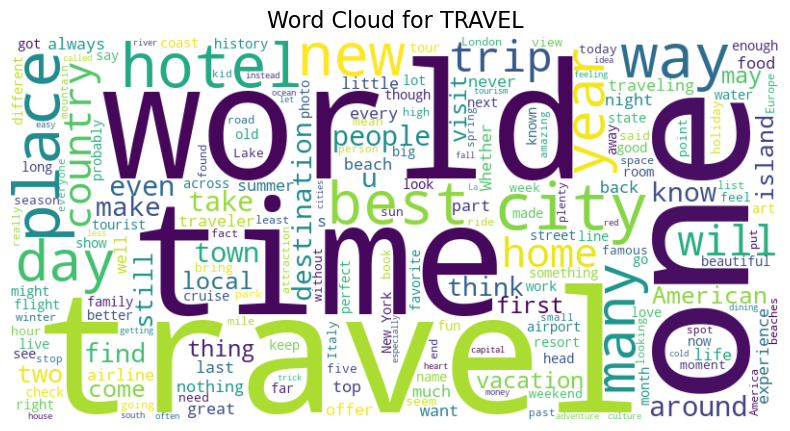

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# make sure train_df has 'short_description' and 'category'
categories = train_df["category"].unique()

for cat in categories:
    # join all text for this category
    text = " ".join(train_df[train_df["category"] == cat]["short_description"].astype(str).tolist())
    
    # generate word cloud
    wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)
    
    # plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {cat}", fontsize=16)
    plt.show()


In [8]:
import pandas as pd
from collections import Counter
import re
import nltk

# Download stopwords if not already done
nltk.download('stopwords', quiet="True")
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Function to clean text and remove stop words
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stop words
    return words

# Dictionary to store top words as sets per category
category_word_sets = {}

for category in train_df['category'].unique():
    # Combine all descriptions in the category
    all_text = " ".join(train_df[train_df['category'] == category]['short_description'].astype(str))
    words = clean_text(all_text)
    
    # Count word frequencies
    word_counts = Counter(words)
    
    # Get the 10 most common words
    top_words = [word for word, count in word_counts.most_common(10)]
    
    # Save as a set
    category_word_sets[category] = set(top_words)

# Example: show the sets
for category, word_set in category_word_sets.items():
    print(f"Category: {category} -> {word_set}")


Category: HOME & LIVING -> {'something', 'one', 'like', 'us', 'check', 'home', 'new', 'make', 'time', 'say'}
Category: POLITICS -> {'donald', 'trumps', 'would', 'republican', 'president', 'one', 'us', 'said', 'new', 'trump'}
Category: SPORTS -> {'game', 'sports', 'one', 'like', 'us', 'said', 'new', 'football', 'team', 'first'}
Category: TRAVEL -> {'best', 'travel', 'one', 'like', 'world', 'new', 'time', 'city', 'youre', 'get'}



## Start with top 10 frequent words per category.

In [9]:
import pandas as pd
from collections import Counter
import re
import nltk

# Download stopwords quietly
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Function to clean text and remove stop words
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Step 1: Create top 10 frequent words per category
def top_freq_words(n):
    category_word_sets = {}
    for category in train_df['category'].unique():
        all_text = " ".join(train_df[train_df['category'] == category]['short_description'].astype(str))
        words = clean_text(all_text)
        word_counts = Counter(words)
        top_words = [word for word, count in word_counts.most_common(n)]
        category_word_sets[category] = set(top_words)
    return category_word_sets

# Step 2: Function to classify a single test sample
def classify_description(desc, category_word_sets):
    words = set(clean_text(desc))
    category_matches = {}
    for category, word_set in category_word_sets.items():
        # Count matches with top 10 words
        match_count = len(words & word_set)
        category_matches[category] = match_count
    # Assign the category with the most matches
    predicted_category = max(category_matches, key=category_matches.get)
    return predicted_category

# Step 3: Apply to test dataset
test_df['predicted_category'] = test_df['short_description'].apply(
    lambda x: classify_description(x, top_freq_words(10))
)

test_df


,short_description,category,predicted_category
0,A: Most plants will appreciate an early mornin...,HOME & LIVING,HOME & LIVING
1,A David Attenborough docuseries and Netflix ad...,HOME & LIVING,HOME & LIVING
2,It's enough to make you consider homeownership.,HOME & LIVING,HOME & LIVING
3,"Whether it's loud neighbors, buzzing pests or ...",HOME & LIVING,HOME & LIVING
4,What greater gift is there than a memory of a ...,HOME & LIVING,HOME & LIVING
...,...,...,...
795,Dream vacations often call to mind sandy beach...,TRAVEL,HOME & LIVING
796,Airlines have begun instituting flexible reboo...,TRAVEL,HOME & LIVING
797,Take a moment for a virtual Travel Tuesday esc...,TRAVEL,TRAVEL
798,(Photo Courtesy of Shutterstock/Dmitry Berkut)...,TRAVEL,TRAVEL


In [16]:
test_df['predicted_category'] = test_df['short_description'].apply(
    lambda x: classify_description(x, top_freq_words(20))
)

test_df

,short_description,category,predicted_category
0,A: Most plants will appreciate an early mornin...,HOME & LIVING,TRAVEL
1,A David Attenborough docuseries and Netflix ad...,HOME & LIVING,HOME & LIVING
2,It's enough to make you consider homeownership.,HOME & LIVING,HOME & LIVING
3,"Whether it's loud neighbors, buzzing pests or ...",HOME & LIVING,HOME & LIVING
4,What greater gift is there than a memory of a ...,HOME & LIVING,TRAVEL
...,...,...,...
795,Dream vacations often call to mind sandy beach...,TRAVEL,HOME & LIVING
796,Airlines have begun instituting flexible reboo...,TRAVEL,SPORTS
797,Take a moment for a virtual Travel Tuesday esc...,TRAVEL,HOME & LIVING
798,(Photo Courtesy of Shutterstock/Dmitry Berkut)...,TRAVEL,HOME & LIVING


## increase it to 20 frequent words

In [10]:
import pandas as pd
from collections import Counter
import re
import nltk

# Download stopwords quietly
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Function to clean text and remove stop words
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Step 1: Create top 20 frequent words per category
category_word_sets = {}
for category in train_df['category'].unique():
    all_text = " ".join(train_df[train_df['category'] == category]['short_description'].astype(str))
    words = clean_text(all_text)
    word_counts = Counter(words)
    top_words = [word for word, count in word_counts.most_common(20)]
    category_word_sets[category] = set(top_words)

# Step 2: Function to classify a single test sample
def classify_description(desc, category_word_sets):
    words = set(clean_text(desc))
    category_matches = {}
    for category, word_set in category_word_sets.items():
        # Count matches with top 20 words
        match_count = len(words & word_set)
        category_matches[category] = match_count
    # Assign the category with the most matches
    predicted_category = max(category_matches, key=category_matches.get)
    return predicted_category

# Step 3: Apply to test dataset
test_df['predicted_category'] = test_df['short_description'].apply(
    lambda x: classify_description(x, category_word_sets)
)

test_df_20 = test_df.copy()
test_df_20

,short_description,category,predicted_category
0,A: Most plants will appreciate an early mornin...,HOME & LIVING,TRAVEL
1,A David Attenborough docuseries and Netflix ad...,HOME & LIVING,HOME & LIVING
2,It's enough to make you consider homeownership.,HOME & LIVING,HOME & LIVING
3,"Whether it's loud neighbors, buzzing pests or ...",HOME & LIVING,HOME & LIVING
4,What greater gift is there than a memory of a ...,HOME & LIVING,TRAVEL
...,...,...,...
795,Dream vacations often call to mind sandy beach...,TRAVEL,HOME & LIVING
796,Airlines have begun instituting flexible reboo...,TRAVEL,SPORTS
797,Take a moment for a virtual Travel Tuesday esc...,TRAVEL,HOME & LIVING
798,(Photo Courtesy of Shutterstock/Dmitry Berkut)...,TRAVEL,HOME & LIVING


In [11]:
import pandas as pd
from collections import Counter
import re
import nltk

# Download stopwords quietly
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Function to clean text and remove stop words
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Step 1: Create top 30 frequent words per category
category_word_sets = {}
for category in train_df['category'].unique():
    all_text = " ".join(train_df[train_df['category'] == category]['short_description'].astype(str))
    words = clean_text(all_text)
    word_counts = Counter(words)
    top_words = [word for word, count in word_counts.most_common(30)]
    category_word_sets[category] = set(top_words)

# Step 2: Function to classify a single test sample
def classify_description(desc, category_word_sets):
    words = set(clean_text(desc))
    category_matches = {}
    for category, word_set in category_word_sets.items():
        # Count matches with top 30 words
        match_count = len(words & word_set)
        category_matches[category] = match_count
    # Assign the category with the most matches
    predicted_category = max(category_matches, key=category_matches.get)
    return predicted_category

# Step 3: Apply to test dataset
test_df['predicted_category'] = test_df['short_description'].apply(
    lambda x: classify_description(x, category_word_sets)
)

test_df_30 = test_df.copy()
test_df_30

,short_description,category,predicted_category
0,A: Most plants will appreciate an early mornin...,HOME & LIVING,HOME & LIVING
1,A David Attenborough docuseries and Netflix ad...,HOME & LIVING,HOME & LIVING
2,It's enough to make you consider homeownership.,HOME & LIVING,HOME & LIVING
3,"Whether it's loud neighbors, buzzing pests or ...",HOME & LIVING,HOME & LIVING
4,What greater gift is there than a memory of a ...,HOME & LIVING,TRAVEL
...,...,...,...
795,Dream vacations often call to mind sandy beach...,TRAVEL,HOME & LIVING
796,Airlines have begun instituting flexible reboo...,TRAVEL,POLITICS
797,Take a moment for a virtual Travel Tuesday esc...,TRAVEL,TRAVEL
798,(Photo Courtesy of Shutterstock/Dmitry Berkut)...,TRAVEL,HOME & LIVING


In [12]:
# Count number of samples per actual and predicted category
counts = test_df_30.groupby(['category', 'predicted_category']).size().reset_index(name='count')
counts

,category,predicted_category,count
0,HOME & LIVING,HOME & LIVING,161
1,HOME & LIVING,POLITICS,11
2,HOME & LIVING,SPORTS,15
3,HOME & LIVING,TRAVEL,13
4,POLITICS,HOME & LIVING,108
5,POLITICS,POLITICS,73
6,POLITICS,SPORTS,7
7,POLITICS,TRAVEL,12
8,SPORTS,HOME & LIVING,112
9,SPORTS,POLITICS,19


In [13]:
import pandas as pd
from collections import Counter
import re
import nltk

# Download stopwords quietly
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Function to clean text and remove stop words
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Step 1: Create top 50 frequent words per category
category_word_sets = {}
for category in train_df['category'].unique():
    all_text = " ".join(train_df[train_df['category'] == category]['short_description'].astype(str))
    words = clean_text(all_text)
    word_counts = Counter(words)
    top_words = [word for word, count in word_counts.most_common(50)]
    category_word_sets[category] = set(top_words)

# Step 2: Function to classify a single test sample
def classify_description(desc, category_word_sets):
    words = set(clean_text(desc))
    category_matches = {}
    for category, word_set in category_word_sets.items():
        # Count matches with top 50 words
        match_count = len(words & word_set)
        category_matches[category] = match_count
    # Assign the category with the most matches
    predicted_category = max(category_matches, key=category_matches.get)
    return predicted_category

# Step 3: Apply to test dataset
test_df['predicted_category'] = test_df['short_description'].apply(
    lambda x: classify_description(x, category_word_sets)
)

test_df_50 = test_df.copy()

In [14]:
# Count number of samples per actual and predicted category
counts1 = test_df_50.groupby(['category', 'predicted_category']).size().reset_index(name='count')
counts1

,category,predicted_category,count
0,HOME & LIVING,HOME & LIVING,149
1,HOME & LIVING,POLITICS,16
2,HOME & LIVING,SPORTS,14
3,HOME & LIVING,TRAVEL,21
4,POLITICS,HOME & LIVING,92
5,POLITICS,POLITICS,87
6,POLITICS,SPORTS,14
7,POLITICS,TRAVEL,7
8,SPORTS,HOME & LIVING,106
9,SPORTS,POLITICS,23


## so at  135 it decrease the accurcy of the predicted category 

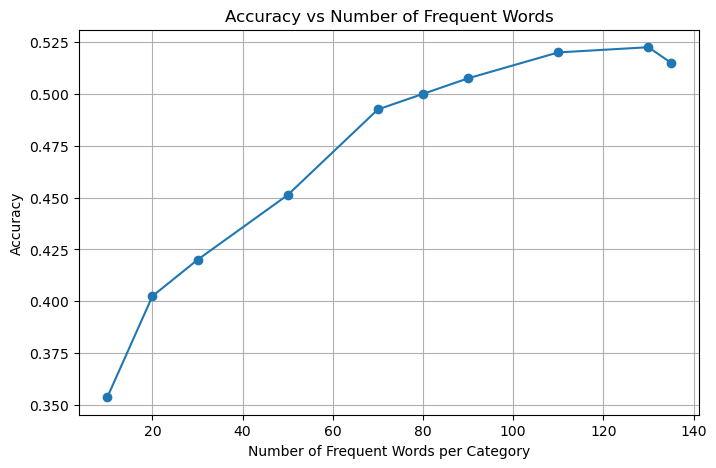

In [15]:


# List of frequent words counts to try
top_n_list = [10, 20, 30, 50, 70, 80, 90, 110, 130, 135]

accuracies = []

# Function to clean text (same as before)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

for n in top_n_list:
    # Step 1: Create top n frequent words per category
    category_word_sets = {}
    for category in train_df['category'].unique():
        all_text = " ".join(train_df[train_df['category'] == category]['short_description'].astype(str))
        words = clean_text(all_text)
        word_counts = Counter(words)
        top_words = [word for word, count in word_counts.most_common(n)]
        category_word_sets[category] = set(top_words)

    # Step 2: Classify test samples
    def classify_description(desc, category_word_sets):
        words = set(clean_text(desc))
        category_matches = {}
        for category, word_set in category_word_sets.items():
            match_count = len(words & word_set)
            category_matches[category] = match_count
        predicted_category = max(category_matches, key=category_matches.get)
        return predicted_category

    test_df['predicted_category'] = test_df['short_description'].apply(
        lambda x: classify_description(x, category_word_sets)
    )

    # Step 3: Compute accuracy
    accuracy = (test_df['category'] == test_df['predicted_category']).mean()
    accuracies.append(accuracy)

# Step 4: Plot
plt.figure(figsize=(8,5))
plt.plot(top_n_list, accuracies, marker='o')
plt.xlabel("Number of Frequent Words per Category")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Frequent Words")
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create DataFrame with 6 rows and 100 columns, values 0–5
df1 = pd.DataFrame(np.random.randint(0, 6, size=(6, 100)))

# Optionally, set column names
df1.columns = [f'Col_{i+1}' for i in range(100)]

# Show first few rows
print(df1.head())
df1


   Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  Col_10  ...  \
0      3      4      2      4      4      1      2      2      2       4  ...   
1      4      0      0      0      0      3      2      2      0       2  ...   
2      0      3      0      5      0      1      3      3      5       1  ...   
3      5      0      2      0      4      1      5      1      1       5  ...   
4      3      1      0      3      4      3      0      5      5       3  ...   

   Col_91  Col_92  Col_93  Col_94  Col_95  Col_96  Col_97  Col_98  Col_99  \
0       1       4       1       0       3       3       3       4       0   
1       2       0       5       4       0       2       1       3       2   
2       5       0       3       2       0       3       5       3       5   
3       0       2       5       4       1       1       2       1       0   
4       5       5       5       3       4       3       1       1       4   

   Col_100  
0        4  
1        5  
2        2 

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_91,Col_92,Col_93,Col_94,Col_95,Col_96,Col_97,Col_98,Col_99,Col_100
0,3,4,2,4,4,1,2,2,2,4,...,1,4,1,0,3,3,3,4,0,4
1,4,0,0,0,0,3,2,2,0,2,...,2,0,5,4,0,2,1,3,2,5
2,0,3,0,5,0,1,3,3,5,1,...,5,0,3,2,0,3,5,3,5,2
3,5,0,2,0,4,1,5,1,1,5,...,0,2,5,4,1,1,2,1,0,4
4,3,1,0,3,4,3,0,5,5,3,...,5,5,5,3,4,3,1,1,4,3
5,0,5,5,4,1,1,5,4,3,1,...,5,0,0,5,3,0,5,4,2,2


In [20]:
import pandas as pd

# Example: df with 6 rows and 100 columns
# For demonstration, random integers 0–5


# Count non-zero values per column
non_zero_counts = (df1 != 0).sum()

print(non_zero_counts)


Col_1      4
Col_2      4
Col_3      3
Col_4      4
Col_5      4
          ..
Col_96     5
Col_97     6
Col_98     6
Col_99     4
Col_100    6
Length: 100, dtype: int64


In [ ]:
import os
import glob
import pandas as pd